# Laboratorium 10 - Dyskretna Transformacja Fouriera

##### Aleksandra Mazur

## Zadanie 1 FFT

Do wykonania zadań skorzystano z następujących bibliotek:
* numpy
* matplotlib
* time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### 1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera $F_n$ i n - elementowego wektora wejściowego $(y = F_nx)$.
$$ n = 2^r$$
$$|F_n|_{jk} = \xi ^ jk$$
$$ \xi = e^{\frac{2 \pi i}{n}}$$

**DFT**, czyli dyskretna transformata Fouriera jest procedurą matematyczną używaną do wyznaczenia zawartości harmonicznej lub częstotliwościowej sygnału dyskretnego. Transformacja Fouriera rozkłada funkcję okresową na szereg funkcji okresowych tak, że uzyskana transformata podaje w jaki sposób poszczególne częstotliwości składają się na pierwotną funkcję.

Funkcja **F** przyjmuje jako argument n - elementowy wektor *x*, a następnie oblicza i zwraca macierz Fouriera $F_n$, korzystając z zależności przedstawionych w treści zadania.

In [2]:
def F_n(x):
    n = len(x)
    F = np.zeros((n, n), dtype=np.complex_)
    
    for j in range(n):
        for k in range(n):
            F[j, k] = np.exp(-(( 2 * np.pi *1j * j * k) / n))

    return F

Funkcja **DFT** przyjmuje jako argument n - elementowy wektor x i korzystając z powyższej funkcji oblicza zależność $y = F_nx$.

In [3]:
def DFT(x):
    return F_n(x) @ x

### 2. Zaimplementuj również IDFT. Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną $$x = F_n^{-1}y$$ oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.

Funkcja **IDFT** przyjmuje jako argument macierz *y*, stosuje transformatę odwrotną i zwraca wektor *x*.

In [4]:
def IDFT(y):
    n = len(y)
    return np.conjugate((F_n(y) @ np.conjugate(y))) / n

Funckja pomocnicza **get_signal_x** generuje zadaną ilość próbek sygnału sinusoidalnego o odpowiednich parametrach, gdzie *f* - częstotliwość sygnału, *fs* - częstotliwość próbkowania i zarazem ilość próbek.

In [5]:
def get_signal_x(fs, f):
    x = np.arange(fs) # the points on the x axis for plotting
    return np.sin(f * np.pi * x / float(fs / 2)) #  the value (amplitude) of the sin wave for each sample

Funkcja **test_signal** korzystając powyższej funkcji tworzy sinusoidalny wektor i przedstawia uzyskany efekt na wykresie.

In [6]:
def test_signal(fs, f):
    signal = get_signal_x(fs,f)
    plt.plot(signal)
    plt.show()

Sygnał sinusoidalny o częstotliwości sygnału 2 Hz i częstotliwości próbkowania 1024 Hz.

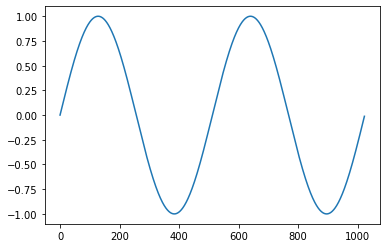

In [7]:
test_signal(1024, 2)

Jak widać na rysunku powyżej, funkcja **get_signal_x** poprawnie tworzy sinusoidy.

Funkcja **test_DFT_IDFT** sprawdza poprawność działań funkcji **DFT** i **IDFT** oraz porównuje wyniki z funkcją biblioteczną **numpy.fft.fft**, wypisując rezultaty dla różnych wartości *n*.

In [8]:
def test_DFT_IDFT():
    for n in [16, 32, 64, 128, 256, 512, 1024]:
        print("N = ", n)
        x = get_signal_x(n, 2)
        my_y = DFT(x)
        
        is_correct = np.allclose(IDFT(my_y), x)
        if is_correct:
            print("IDFT(DFT(x)) == x")
        else:
            print("IDFT(DFT(x)) != x")
            
        lib_y = np.fft.fft(x, n)
        print("The result agrees with the library function: ", np.allclose(my_y, lib_y))
        print("")

In [9]:
test_DFT_IDFT()

N =  16
IDFT(DFT(x)) == x
The result agrees with the library function:  True

N =  32
IDFT(DFT(x)) == x
The result agrees with the library function:  True

N =  64
IDFT(DFT(x)) == x
The result agrees with the library function:  True

N =  128
IDFT(DFT(x)) == x
The result agrees with the library function:  True

N =  256
IDFT(DFT(x)) == x
The result agrees with the library function:  True

N =  512
IDFT(DFT(x)) == x
The result agrees with the library function:  True

N =  1024
IDFT(DFT(x)) == x
The result agrees with the library function:  True



Jak widać powyżej funkcja realizująca DFT działa poprawnie. Można to wywnioskować zarówno przez zastosowanie transformacji odwrotnej, jak i z porównania z funkcją biblioteczną **numpy.fft.fft**.

### 3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $F_n$ dla danych o różnym rozmiarze.

Funkcja **FFT** to implementacja rekurencyjnego algorytmu Cooleya-Turkeya, który rozbija DFT na mniejsze DFT. Jako argument przyjmuje macierz *x*, a zwraca macierz *y*.

In [10]:
def FFT(x):
    n = len(x)
    if n == 1:
        return [x[0]]

    y = np.zeros(n, dtype=np.complex_)
    y_even = FFT(x[0::2])
    y_odd = FFT(x[1::2])

    m = int(n/2)

    for i in range(m):
        eps = np.exp(-2 * np.pi * 1j * i / n)
        odd = y_odd[i] * eps
        y[i] = y_even[i] + odd
        y[i + m] = y_even[i] - odd
    return y

Funkcja pomocnicza **check_time** jako argumenty przyjmuje funkcję *function*, wektor *x*, liczbę *n* i informację czy dana funkcja wymaga podania tylko jednego argumentu *one_argument*. Zwracany jest czas działania danej funkcji.

In [11]:
def check_time(function, x, n = 0, one_argument = True):
    start = time.time()
    if one_argument:
        result = function(x)
    else:
        result = function(x, n)
    end = time.time()
    
    return end - start

Funkcja **compare_functions** wypisuje czasy działania funkcji bibliotecznej **numpy.fft.fft**, algorytmu Cooleya-Turkeya i implementacji z mnożeniem macierzy dla różnych rozmiarów *n*.

In [12]:
def compare_functions():
    for n in [16, 32, 64, 128, 256, 512, 1024]:
        print("n = ", n)
        x = get_signal_x(n, 2)
        vector_time = check_time(function = DFT, x = x)
        recursive_time = check_time(function = FFT, x = x)
        lib_time = check_time(np.fft.fft, x, n, False)
        
        print("Vector multiplication (DFT): ", vector_time)
        print("Cooley-Turkey (FFT): ", recursive_time)
        print("Library function: ", lib_time)
        print("")

In [13]:
compare_functions()

n =  16
Vector multiplication (DFT):  0.000997304916381836
Cooley-Turkey (FFT):  0.0009989738464355469
Library function:  0.0

n =  32
Vector multiplication (DFT):  0.003989219665527344
Cooley-Turkey (FFT):  0.000997781753540039
Library function:  0.0

n =  64
Vector multiplication (DFT):  0.016953229904174805
Cooley-Turkey (FFT):  0.0009984970092773438
Library function:  0.0

n =  128
Vector multiplication (DFT):  0.03490447998046875
Cooley-Turkey (FFT):  0.001995086669921875
Library function:  0.0

n =  256
Vector multiplication (DFT):  0.11668920516967773
Cooley-Turkey (FFT):  0.005984783172607422
Library function:  0.0

n =  512
Vector multiplication (DFT):  0.46575212478637695
Cooley-Turkey (FFT):  0.007977962493896484
Library function:  0.0

n =  1024
Vector multiplication (DFT):  1.7293727397918701
Cooley-Turkey (FFT):  0.01894855499267578
Library function:  0.0



## Wnioski:
Funkcja biblioteczna **numpy.fft.fft** jest najszybsza, trochę od niej wolniejszy jest algorytm Cooleya-Turkeya **FFT**, a najwolniejsza jest implementacja z mnożeniem macierzy **DFT**. Czas działania funkcji bibliotecznej jest zerowy dla każdego *n*. Z kolei dla pozostałych funkcji czas ten rośnie wraz ze zwiększaniem liczby *n*.

Przekształcenia Fouriera, a więc i FFT, stosuje się do przetwarzania sygnałów. Analiza Fouriera pozwala nam wyrazić sygnał jako ważoną sumę przesuniętych w fazie sinusoid o różnych częstotliwościach. Wśród wielu zastosowań FFT wyróżnić należy techniki kompresji stosowane do kodowania cyfrowych obrazów wideo i dźwięków, włączając w to pliki MP3.

Celem FFT jest zmniejszenie długiego algorytmu obliczeniowego przez jego podział na krótsze i prostsze obliczenia DFT i skrócenie czasu obliczeń, co widać na wynikach czasowych.

## Zadanie 2 DFT w 1D

### Wygeneruj dwa sygnały czasowo-amplitudowe: 
#### a)  Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach 

Funkcja **create_signal_A** tworzy i przedstawia na wykresie wyżej wspomniany sygnał.

In [14]:
def create_signal_A(N):
    signal_A = get_signal_x(N, 2) + get_signal_x(N, 3) + get_signal_x(N, 5) + get_signal_x(N, 7) + get_signal_x(N, 10)
    plt.plot(signal_A)
    plt.show()
    return signal_A

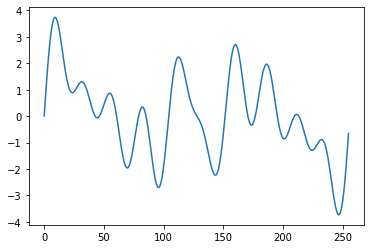

In [15]:
signal_A = create_signal_A(256)

#### b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

Funkcja **create_signal_B** tworzy i przedstawia na wykresie wyżej wspomniany sygnał.

In [16]:
def create_signal_B(N):
    signal_B = np.append(
                    np.append(
                        np.append(
                            np.append(
                            get_signal_x(int(N/5), 2), get_signal_x(int(N/5), 3)), 
                        get_signal_x(int(N/5), 5)),
                    get_signal_x(int(N/5), 7)), 
                get_signal_x(N - 4 * int(N/5), 10))
    
    plt.plot(signal_B)
    plt.show()
    return signal_B

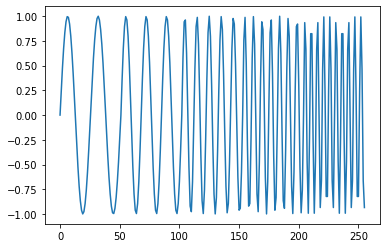

In [17]:
signal_B = create_signal_B(256)

### Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część urojoną wyniku transformacji.

Funkcja **transform_signal** używając funkcji **FFT** dokonuje transformacji sygnału, a następnie rysuje część rzeczywistą i urojoną otrzymanego wyniku.

In [18]:
def transform_signal(signal):
    y = FFT(signal)
    
    plt.plot(np.real(y))
    plt.title("real part")
    plt.show()
    
    plt.plot(np.imag(y))
    plt.title("imaginary part")
    plt.show()

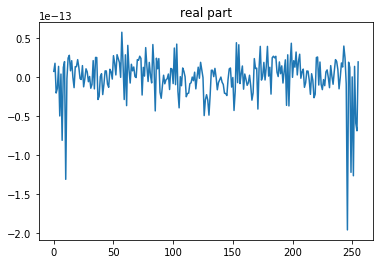

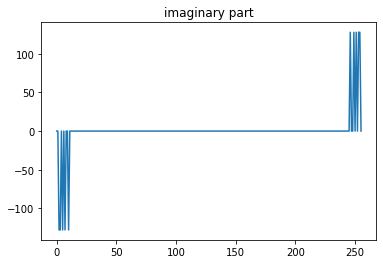

In [19]:
transform_signal(signal_A)

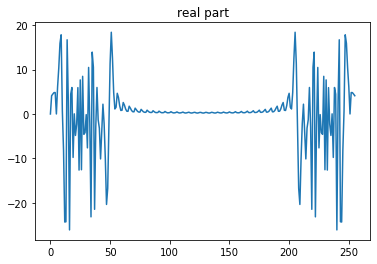

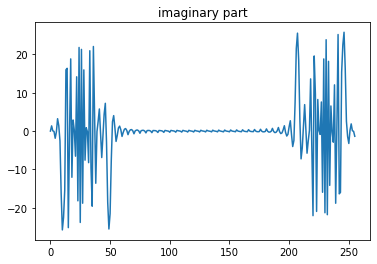

In [20]:
transform_signal(signal_B)

## Wnioski:
Część rzeczywista i urojona sygnału będącego sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach znacznie się różnią. Według mnie sygnał ten lepiej reprezentowany jest przez część urojoną wyniku. Może na to wpływać fakt, że w postaci trygonometrycznej liczby zespolonej część urojona jest reprezentowana przez funkcję sinus.

Z kolei dla sygnału złożonego z pięciu sygnałów ułożonych przedziałami część rzeczywista i urojona znacznie mniej się różnią. Część rzeczywista wydaje się być symetryczna względem osi pionowej przebiegającej przez środek wykresu (prostej x = 125 - symetria parzysta). Z kolei część urojona jest prawdopodobnie symetryczna względem środka wykresu - punktu (0, 125) - symetria nieparzysta. Może to mieć ponownie związek z faktem, że część urojona liczby zespolonej jest reprezentowana przez funkcję sinus (funkcję nieparzystą), a część rzeczywista - przez funkcję cosinus (funkcję parzystą).

Porównując oba przypadki, wydaje mi się, że transformacja sygnału złożonego z sygnałów ułożonych przedziałami osiąga lepsze rezultaty.

DFT pozwala analizować, badać i syntetyzować sygnały w sposób niemożliwy do wykorzystania przy przetwarzaniu sygnałów ciągłych (analogowych).